In [1]:
%matplotlib inline

# Importing some tools for loading data and plotting
import matplotlib.pyplot as plt   # plotting tools
import numpy as np                # numpy for math on arrays
import pandas as pd    # pandas gives us DataFrames
import seaborn as sns  # seaborn helps us plot more easily

# This is the clustering algorithm we will try to understand - KMeans
from sklearn.cluster import KMeans

# The metrics package helps us evaluate our clustering approach. 
from sklearn import metrics

In [2]:
# Step 1: load the data. It is formatted in "comma-separated values" format, or "csv"
wine_df = pd.read_csv('wine_data_clubes.csv')

# Step 2: let's take a look at the beginning of the data.
wine_df.head()

,class,alcohol,malic,ash,mg,hue,od_ratio,proline
0,1,14.23,1.71,2.43,127,1.04,3.92,1065
1,1,13.20,1.78,2.14,100,1.05,3.40,1050
2,1,13.16,2.36,2.67,101,1.03,3.17,1185
3,1,14.37,1.95,2.50,113,0.86,3.45,1480
4,1,13.24,2.59,2.87,118,1.04,2.93,735


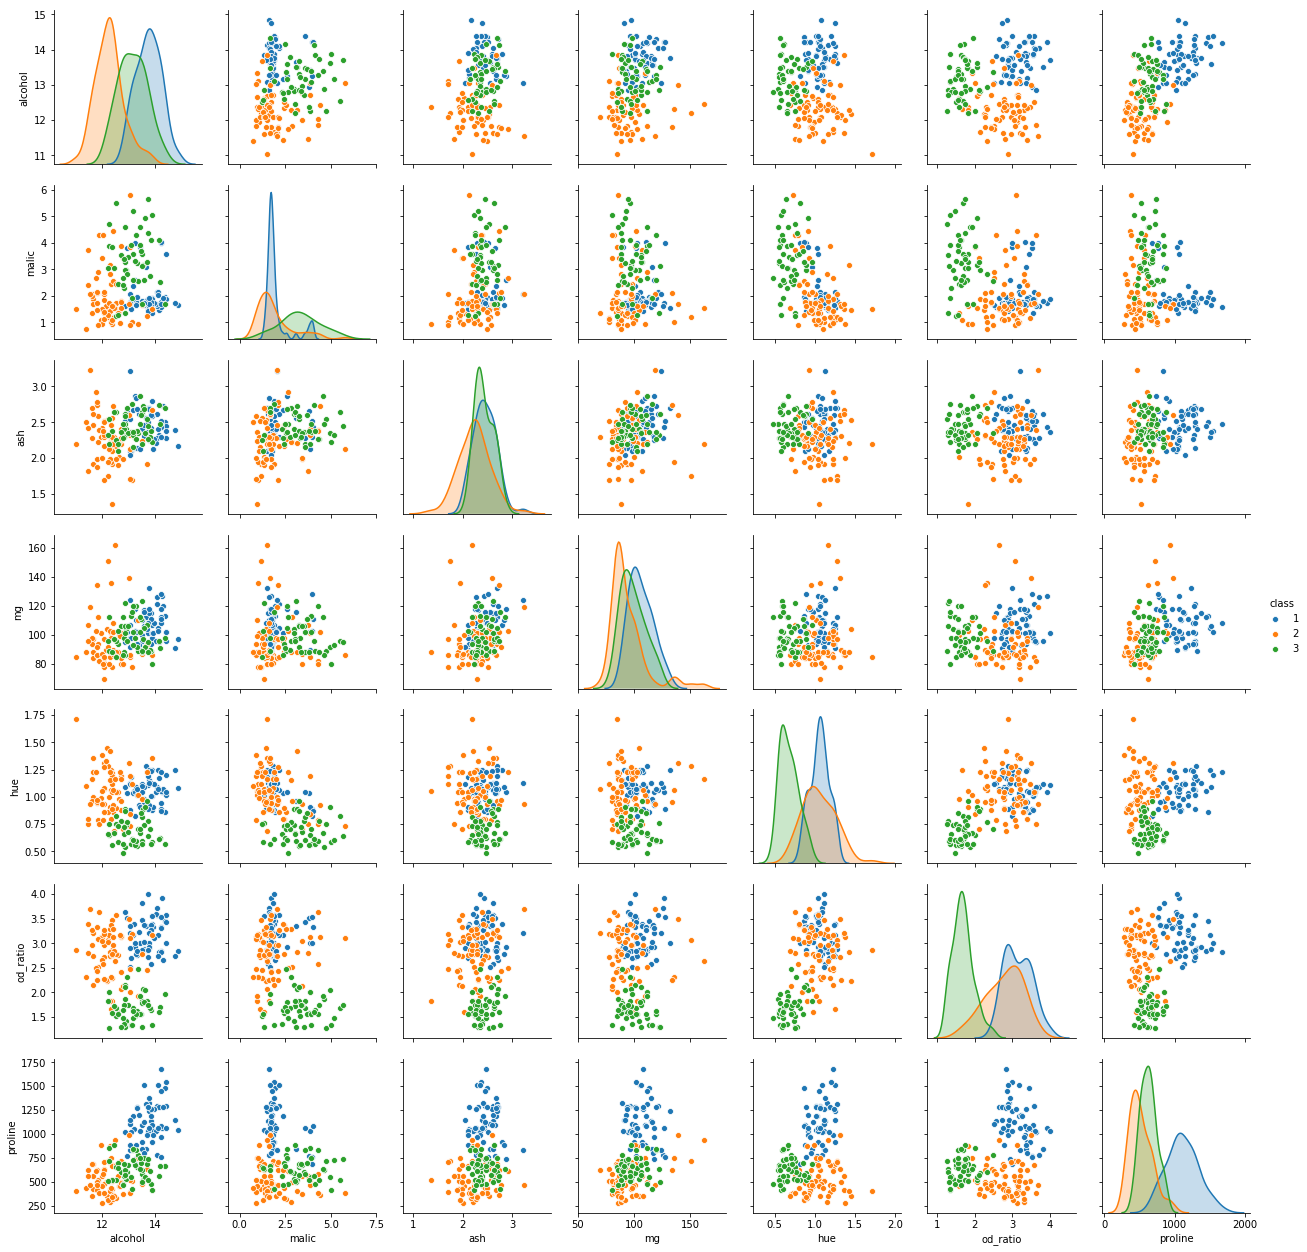

In [3]:
# Seaborn has a nice tool for looking at all pairs of data about the wine.
sns.pairplot(wine_df,       # looking at the wine data
             hue='class',   # color by 'class' column
             vars=wine_df.columns[1:])  # skip the class column, which is first, since it is the color

## Feature selection
Notice that the wines (different colors of points) are very well separated in the two-dimensional plot of 'od_ratio' against 'alcohol'.

* 'od_ratio' has someting to do with the color and darkness of the wine
* 'alcohol' is the alcohol content of the wine in % 

This is a simple version of "feature selection" - we select "features" of the wines that do a good job
telling them apart in two dimensions. We did this by eye, but you can imagine writing an algorithm that does this. Spend a minute thinking about how you would do this.

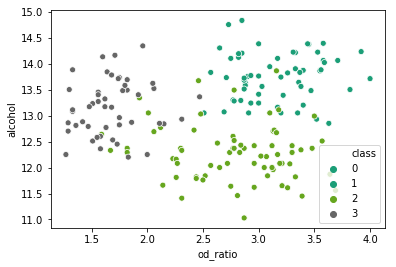

In [4]:
# Now let's take a look at a 2D plot of these data. 
sns.scatterplot(data=wine_df, x='od_ratio', y='alcohol', # scatter of alcohol vs od_ratio
                hue='class',      # color by which wine it is.
                palette='Dark2')  # use darker colors to make it easier to see. 

In [5]:
# So our goal here is to guess which kind of wine we are talking about based on these two properties alone. 
# How would you go about this? Imagine you want to program a computer to win a wine-tasting competition. 

# One strategy is to find groups of "close" points in the 2D plot above. 
# The KMeans algorithm does this. Let's run it and try to figure it out. 

# First - we only want KMeans to look at the od_ratio and alcohol variables
cols = ['od_ratio', 'alcohol']
wine_clusters = wine_df[cols].copy()

# We know that there are 3 groups. 
kmeans = KMeans(n_clusters=3)

# We ask KMeans to "fit" the data that we have, i.e. learn from it. 
kmeans.fit(wine_clusters)
# Now we ask KMeans to predict clusters that same data
clusters = kmeans.predict(wine_clusters)

# Let's save the clusters and have a look
wine_clusters['cluster'] = clusters
wine_clusters.head()

,od_ratio,alcohol,cluster
0,3.92,14.23,2
1,3.40,13.20,2
2,3.17,13.16,2
3,3.45,14.37,2
4,2.93,13.24,2


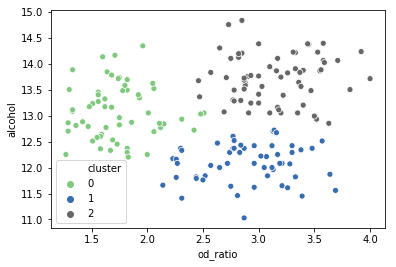

In [6]:
# Plot the data according to the clusters. 
sns.scatterplot(data=wine_clusters, x='od_ratio', y='alcohol', hue='cluster', palette='Accent')

## Evaluating our results
By eye the clustering looks pretty good, right? This leaves us with two important questions:
* How does the algorithm work?
* How do we decide if it did a good job? 

We'll start with the second question and move to the first. 

Even though this is technically an instance of "unsupervised learning" because we didn't tell the KMeans algorithm which wine was which, we happen to know the answer! That means we can evaluate the clustering based on how well the clusters match the true classes. What we'd like to know is this: what fraction of the wines are assigne to the "right" cluster?

In [7]:
# Let's look at the clusters by making a single data frame with both true and predicted values. 
true_pred_class_df = pd.DataFrame([wine_df['class'], wine_clusters['cluster']]).T
print((true_pred_class_df[true_pred_class_df['class'] != true_pred_class_df['cluster']]).head(n=20))

# Notice that the classes and the cluster labels aren't the same! That's because we didn't tell KMeans what 
# the classes are - it just chose at random (as you'll see below). 

# Let's fix the classes to match and then we can calculate accuracy. 
# You will have to do this differently each time because the clusters labels are random!
#true_pred_class_df['cluster'].replace({2:3}, inplace=True)

# metrics.accuracy() asks: what fraction of wines were given the correct cluster label. 
#accuracy_pct = 100*metrics.accuracy_score(true_pred_class_df['class'], true_pred_class_df['cluster'])
#print('clustering accuracy: %.2f%%' % accuracy_pct)

    class  cluster
0       1        2
1       1        2
2       1        2
3       1        2
4       1        2
5       1        2
6       1        2
7       1        2
8       1        2
9       1        2
10      1        2
11      1        2
12      1        2
13      1        2
14      1        2
15      1        2
16      1        2
17      1        2
18      1        2
19      1        2


## Exercises:
* Can you implement accuracy() yourself? 
* Bonus: what if the labels aren't the same? How would you calculate accuracy automatically? 

## Using clusters for prediction
If we really want a computer to win a wine-tasting contest, we need to be able to predict the classes of new wines haven't tasted before. Above we calculated the accuracy of our clusters for wines we already saw, but we didn't predict anything! All the wines we tested ourselves on were also used to make the clustering. 

Question: how would you go about evaluating the quality of your clustering as a means of prediction? 

Let's try do test prediction by "leaving out" some data. This is called a "train-test split" where we use some of the data to "learn" or "train" and the rest of the data to test the quality of our learning. 

In [8]:
# So our goal here is to guess which kind of wine we are talking about based on these two properties alone. 
# How would you go about this? Imagine you want to program a computer to win a wine-tasting competition. 

# One strategy is to find groups of "close" points in the 2D plot above. 
# The KMeans algorithm does this. Let's run it and try to figure it out. 

# First - we only want KMeans to look at the od_ratio and alcohol variables
cols = ['od_ratio', 'alcohol']
wine_clusters = wine_df[cols].copy()

# We have data for 178 wines, so we can reserve 17 wines for testing (about 10%).
print(wine_clusters.describe())

# We will grab 17 wines evenly spaced through the dataset. 
# We do this because the data is in a particular order, so grabbing from the end will give us all one type of wine. 
subset = np.arange(0, 178, 10)
print('subset indices', subset)
test_set = wine_clusters.iloc[subset]

# The remaining wines (after dropping those ten) are
train_set = wine_clusters.drop(subset, axis=0)

# Make sure we did the splitting right - look at the index.
print(train_set.tail(n=3))
print(test_set.head(n=3))

         od_ratio     alcohol
count  178.000000  178.000000
mean     2.611685   13.000618
std      0.709990    0.811827
min      1.270000   11.030000
25%      1.937500   12.362500
50%      2.780000   13.050000
75%      3.170000   13.677500
max      4.000000   14.830000
subset indices [  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170]
     od_ratio  alcohol
175      1.56    13.27
176      1.62    13.17
177      1.60    14.13
    od_ratio  alcohol
0       3.92    14.23
10      3.17    14.10
20      3.71    14.06


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


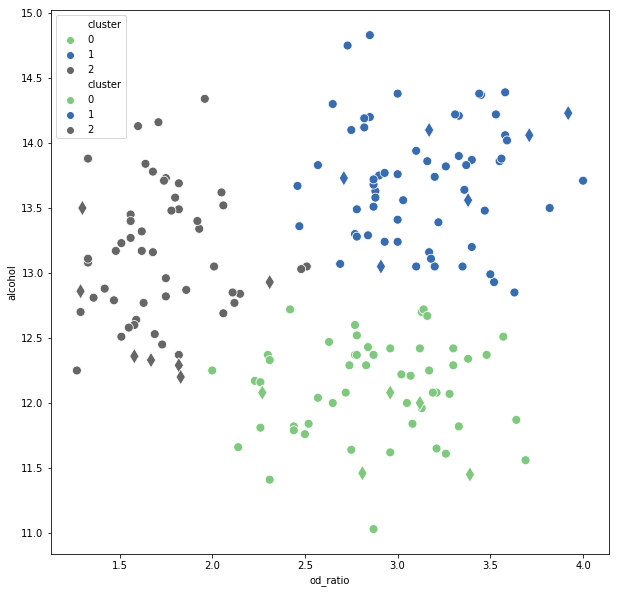

In [9]:
# Now lets run KMeans again only on the test data. 
kmeans = KMeans(n_clusters=3)

# We ask KMeans to "fit" the data that we have, i.e. learn from it. 
kmeans.fit(train_set)

# Now we ask KMeans to predict clusters for both sets.
# Remember, we only showed KMeans the training set.
train_clusters = kmeans.predict(train_set)
test_clusters = kmeans.predict(test_set)

# Let's save the clusters and have a look
train_set['cluster'] = train_clusters
test_set['cluster'] = test_clusters

# Plot the data according to the clusters. 
figure = plt.figure(figsize=(10,10))
sns.scatterplot(data=train_set, x='od_ratio', y='alcohol', hue='cluster', palette='Accent', s=80)
sns.scatterplot(data=test_set, x='od_ratio', y='alcohol', hue='cluster', palette='Accent', marker='d', s=120)
# Looks about right, huh? 

## Evaluating predictions
You can see that this approach does a good job - all the wines in the testing set go into the right cluster even though they were not used for training. Can you think of good ways of evaluating the quality of predictions? It's useful to think about evaluating "unsupervised" and "supervised" results separately. 

Here we are using an unsupervised clustering algorithm for wines, but evaluating the results as if they came from a supervised algorithm by asking how well they match our knowledge of which wine is which. But what if we DIDNT KNOW which wine was which? This could happen if the dataset was a large collection of images that we hadn't looked at manually, for example. 

In both cases, it is useful to ask: how should we choose the training and test sets? How big should they be? What should we do when getting data is a lot of work and so our dataset is small? This are all useful questions for futher exploration as you study topics like "cross-validation" in machine learning. 

## How does KMeans work??
As the name suggests there is a number K and there are some "means" otherwise known as averages. KMeans requires you to specify the number of clusters in advance. Remember we started by telling the algorithm to look for 3 clusters - so K = 3 in that case. 

The algorithm always maintains K "centroids" that represent the center of the K clusters. These are initially set to random points. The algorithm then proceeds in rounds, where each round has two steps:

1. E-steps: points are assigned to the cluster associated with the closest centroid. 
2. M-steps: new centroids are calculated by taking the average of the points assigned.

Below we walk through an example of two KMeans steps for the wine data. 

In [10]:
# Before starting: we pick 3 random points as centroids for K=3 clusters. 
# X is od_ratio, which goes from 1 -> 4
# Y is alcohol, which goes from 11->15%
rand_od = np.random.uniform(low=1.0, high=4.0, size=3)
rand_alc = np.random.uniform(low=11.0, high=15.0, size=3)

# We want centroids to have the same format as the data, where each row is a different centroid
# and the columns are the X and Y values.
centroids = np.vstack([rand_od, rand_alc]).T

# First - we only want KMeans to look at the od_ratio and alcohol variables
cols = ['od_ratio', 'alcohol']
data_points = wine_df[cols].copy()
cluster_data = data_points.copy()   # For keeping track

In [11]:
# Import a function to calculate the closest centroid to each point in the data
from sklearn.metrics import pairwise_distances_argmin

# E-step: calculate the closest points
closest_centroids = pairwise_distances_argmin(data_points, centroids)

# M-step: recalculate the centroids.
new_centroids = []
for i in np.arange(3):
    # get the average of the points that are closest to centroid i
    # mean = average
    # axis=0 means take the average of the columns
    centroid_i = data_points[closest_centroids == i].mean(axis=0)
    new_centroids.append(centroid_i)
new_centroids = np.array(new_centroids)
cluster_data['first_round'] = closest_centroids
print('Initial centroids')
print(centroids)
print('New centroids after one round')
print(new_centroids)
print('Difference')
print(centroids - new_centroids)

Initial centroids
[[ 3.94092907 12.27458703]
 [ 2.60483807 13.14185578]
 [ 2.52865838 12.58044409]]
New centroids after one round
[[ 3.45789474 12.32105263]
 [ 2.64208791 13.65989011]
 [ 2.33455882 12.30823529]]
Difference
[[ 0.48303433 -0.0464656 ]
 [-0.03724984 -0.51803433]
 [ 0.19409956  0.2722088 ]]


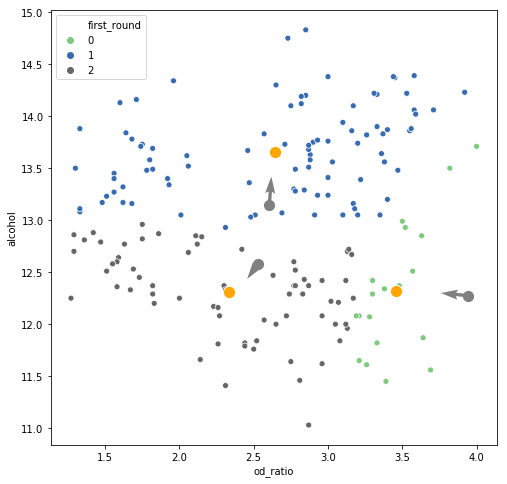

In [12]:
plt.figure(figsize=(8,8))
# Make a scatter plot of the data, coloring by the closest centroid
sns.scatterplot(data=cluster_data, x='od_ratio', y='alcohol', hue='first_round', palette='Accent')

# Now we plot the intial, random centroids
plt.scatter(centroids[:,0], centroids[:,1], color='grey', s=150, edgecolors='w')

# Notice that the effect of the algorithm is to choose incrementally better centroids
plt.scatter(new_centroids[:,0], new_centroids[:,1], color='orange', s=150, edgecolors='w')

# Plot an arrow showing direction it moved. You can see what happened to each of the centroids - 
delta = new_centroids - centroids
plt.quiver(centroids[:,0], centroids[:,1], delta[:,0], delta[:,1], color='grey')


In [13]:
# Repeat - find the closest centroids again!
closest_centroids2 = pairwise_distances_argmin(data_points, new_centroids)

# Recalculate the new centroids again!
new_centroids2 = []
for i in np.arange(3):
    # get the average of the points that are closest to centroid i
    # mean = average
    # axis=0 means take the average of the columns
    centroid_i = data_points[closest_centroids2 == i].mean(axis=0)
    new_centroids2.append(centroid_i)
new_centroids2 = np.array(new_centroids2)
cluster_data['second_round'] = closest_centroids2
print('Previous centroids')
print(new_centroids)
print('New centroids after two rounds')
print(new_centroids2)
print('Difference')
print(new_centroids - new_centroids2)

Previous centroids
[[ 3.45789474 12.32105263]
 [ 2.64208791 13.65989011]
 [ 2.33455882 12.30823529]]
New centroids after two rounds
[[ 3.26176471 12.27352941]
 [ 2.72939759 13.72638554]
 [ 2.08918033 12.41836066]]
Difference
[[ 0.19613003  0.04752322]
 [-0.08730968 -0.06649543]
 [ 0.2453785  -0.11012536]]


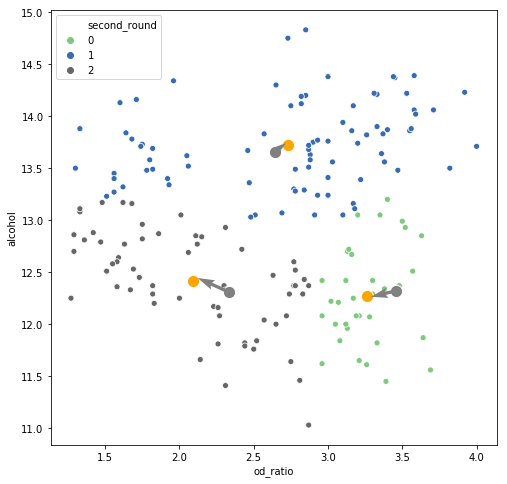

In [14]:
plt.figure(figsize=(8,8))
# Make a scatter plot of the data, coloring by the closest centroid
sns.scatterplot(data=cluster_data, x='od_ratio', y='alcohol', hue='second_round', palette='Accent')

# Plot the previous centroids
plt.scatter(new_centroids[:,0], new_centroids[:,1], color='grey', s=150, edgecolors='w')

# Notice that the centroids have improved again
plt.scatter(new_centroids2[:,0], new_centroids2[:,1], color='orange', s=150, edgecolors='w')

# Plot an arrow showing direction it moved. You can see what happened to each of the centroids - 
delta = new_centroids2 - new_centroids
plt.quiver(new_centroids[:,0], new_centroids[:,1], delta[:,0], delta[:,1], color='grey')


## Only two rounds!
After two rounds we already see that clusters are starting to form and make sense given what we already know about the data. This is pretty amazing, but it's also due to the fact that we were smart about "feature selection" - that we chose two features that do a good job of separating the wines into three classes that can be identified with KMeans. Can you imaging how KMeans would work in three dimensions? That is: with three features? What about four or five? 

## Visualizing KMeans in one graphic
The code below makes a nice visualization of the E-steps and M-steps. If you can understand what it does then you've learned a lot!

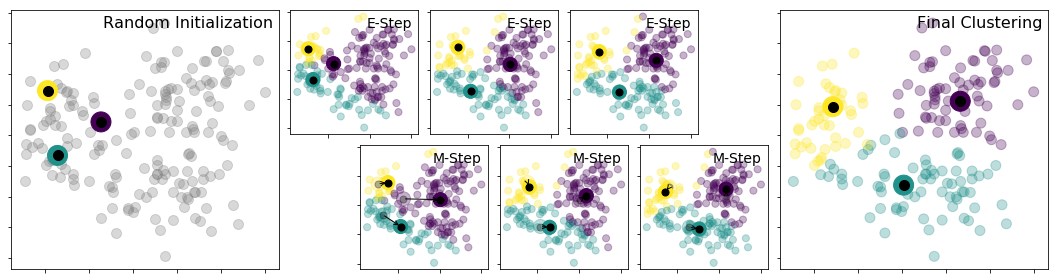

In [15]:
# Produces a nice visualization of our clustering, based on the link below.
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# Will not review this code in class. 
from sklearn.metrics import pairwise_distances_argmin

# Grab the data. 
cols = ['od_ratio', 'alcohol']
X = wine_df[cols].copy().values
y_true = wine_df['class']

# Make random centers as above
rand_od = np.random.uniform(low=1.0, high=4.0, size=3)
rand_alc = np.random.uniform(low=11.0, high=15.0, size=3)
centers = np.vstack([rand_od, rand_alc]).T


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(3), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(3)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(3):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)
plt.show()